# Permutation cluster test on Global Field Power

Mathematically, GFP equals the root mean square (RMS) across the average-referenced electrode values at a given instant in time. GFP is the standard deviation of all electrodes at a given time, and is a measure of the strength of the EEG response in any given condition. In the case of ERPs, the resultant GFP waveform is a measure of potential as a function of time. It is important to recall, however, that because GFP is a non-linear trans- formation, the GFP of the group-average ERP is not equivalent to the mean GFP of the single-subject ERPs (Murray, Brunet, Michel, 2008). Therefore, for each subject and condition we average the ERPs, then extract the GFP. We do not create a grand average first, and then extract the GFP, as this is not interpretable. For further reading, see References below.

References
https://link.springer.com/content/pdf/10.1007/s10548-008-0054-5.pdf

https://www.tandfonline.com/doi/abs/10.1080/87565641.2011.636851

https://books.google.ch/books?hl=en&lr=&id=-l-GDQdadPMC&oi=fnd&pg=PA21&dq=ERPs+analysis+tutorial+murray&ots=JfqwzIx1NN&sig=jRugk3WkX7_v38u5Tfid0lNJblU&redir_esc=y#v=onepage&q=ERPs%20analysis%20tutorial%20murray&f=false

https://journals.sagepub.com/doi/full/10.1177/1094428118804657

In [1]:
#reset your workspace and load libraries and functions

%reset
import mne
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
from mne.stats import permutation_cluster_test,f_mway_rm,f_threshold_mway_rm
from scipy.stats import sem, pearsonr
from math import sqrt
import copy

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


# Loading the Data

In [10]:
#declare path, figure path, participant names or IDs and data file path
gen_path = '/Users/tivadarr/WorkFiles/Bern/Experiment1/EEG_data/subjects/'
filep_figures = '/Users/tivadarr/WorkFiles/Bern/Experiment1/EEG_data/results_pics/permutationclustertest/'
participants = ['P04','P05','P06','P08','P10','P11','P12','P13','P14','P15','P16','P17','P18','P19',
                'P20','P21','P22','P23','P25','P26','P27']

filep = '/Users/tivadarr/WorkFiles/Bern/Experiment1/EEG_data/subjects/'

In [3]:
# Initialize array of epochs and data

ev_zero = []
ev_hundred = []
ev_seventy = []
ev_seventyone = []
ev_thirty = []
ev_thirtyone = []
gfp_zero = []
gfp_hundred = []
gfp_seventy = []
gfp_seventyone = []
gfp_thirty = []
gfp_thirtyone = []
all_gfp = []
current_epochs = []
epochs_participants = []


# for each participant, load epochs, and save inside a variable

for i,e in enumerate (participants):
    epochs_path = gen_path + participants[i] + '/'+ participants[i] + "_preproc-epo.fif"
    print(epochs_path)
    current_epochs = mne.read_epochs(epochs_path, preload=True)
    print(current_epochs)
    epochs_participants.append(current_epochs)
    print(current_epochs.event_id)
    
# Extract unique events using event IDs (here I have 6 conditions)

    events_zero = [e for e in current_epochs.event_id if 'zero' in e]
    ev_zero.append(events_zero)
    events_hundred = [e for e in current_epochs.event_id if 'hundred' in e]
    ev_hundred.append(events_hundred)
    events_thirty = [e for e in current_epochs.event_id if 'silence30' in e]
    ev_thirty.append(events_thirty)
    events_thirtyone = [e for e in current_epochs.event_id if 'target30' in e]
    ev_thirtyone.append(events_thirtyone)
    events_seventy = [e for e in current_epochs.event_id if 'silence70' in e]
    ev_seventy.append(events_seventy)
    events_seventyone = [e for e in current_epochs.event_id if 'target70' in e]
    ev_seventyone.append(events_seventyone)

# Load time structure and electrode names

times = current_epochs[0].times      
electrodes = current_epochs.ch_names

/Users/tivadarr/WorkFiles/Bern/Experiment1/EEG_data/subjects/P04/P04_preproc-epo.fif
Reading /Users/tivadarr/WorkFiles/Bern/Experiment1/EEG_data/subjects/P04/P04_preproc-epo.fif ...
    Found the data of interest:
        t =    -100.00 ...    1700.00 ms
        0 CTF compensation matrices available
767 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
<EpochsFIF  |   767 events (all good), -0.1 - 1.7 sec, baseline [-0.1, 0], ~1.08 GB, data loaded,
 'hundred': 185
 'silence30': 132
 'silence70': 60
 'target30': 63
 'target70': 135
 'zero': 192>
{'zero': 9, 'silence30': 30, 'target30': 31, 'silence70': 70, 'target70': 71, 'hundred': 101}
/Users/tivadarr/WorkFiles/Bern/Experiment1/EEG_data/subjects/P05/P05_preproc-epo.fif
Reading /Users/tivadarr/WorkFiles/Bern/Experiment1/EEG_data/subjects/P05/P05_preproc-epo.fif ...
    Found the data of interest:
        t =    -100.00 ...    1700.00 ms
        0 CTF compensation matrices 

0 projection items activated
<EpochsFIF  |   873 events (all good), -0.1 - 1.7 sec, baseline [-0.1, 0], ~1.23 GB, data loaded,
 'hundred': 221
 'silence30': 152
 'silence70': 67
 'target30': 66
 'target70': 151
 'zero': 216>
{'zero': 9, 'silence30': 30, 'target30': 31, 'silence70': 70, 'target70': 71, 'hundred': 101}
/Users/tivadarr/WorkFiles/Bern/Experiment1/EEG_data/subjects/P18/P18_preproc-epo.fif
Reading /Users/tivadarr/WorkFiles/Bern/Experiment1/EEG_data/subjects/P18/P18_preproc-epo.fif ...
    Found the data of interest:
        t =    -100.00 ...    1700.00 ms
        0 CTF compensation matrices available
773 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
<EpochsFIF  |   773 events (all good), -0.1 - 1.7 sec, baseline [-0.1, 0], ~1.09 GB, data loaded,
 'hundred': 191
 'silence30': 135
 'silence70': 55
 'target30': 57
 'target70': 139
 'zero': 196>
{'zero': 9, 'silence30': 30, 'target30': 31, 'silence70': 70, 'tar

In [4]:
# Takes the GFP of the mean over all trials for each participant and condition (GFP is non-linear) 
# The data is in shape (nr. of participants, electrodes, time)

# initialise lists

gfp0, gfp100, gfp30, gfp31, gfp70, gfp71 = [], [], [], [], [], []

# extract gfp and append to lists

for i in range(len(participants)):
    print("participant - ", participants[i])
    gfp0.append(epochs_participants[i][ev_zero[i]].average()._data.std(0))                                   
    gfp100.append(epochs_participants[i][ev_hundred[i]].average()._data.std(0))
    gfp30.append(epochs_participants[i][ev_thirty[i]].average()._data.std(0))
    gfp31.append(epochs_participants[i][ev_thirtyone[i]].average()._data.std(0))
    gfp70.append(epochs_participants[i][ev_seventy[i]].average()._data.std(0))
    gfp71.append(epochs_participants[i][ev_seventyone[i]].average()._data.std(0))


participant -  P04
participant -  P05
participant -  P06
participant -  P08
participant -  P10
participant -  P11
participant -  P12
participant -  P13
participant -  P14
participant -  P15
participant -  P16
participant -  P17
participant -  P18
participant -  P19
participant -  P20
participant -  P21
participant -  P22
participant -  P23
participant -  P25
participant -  P26
participant -  P27


In [5]:
# turn list to array to use it in further computation
gfp0 = np.asarray(gfp0)
gfp100 = np.asarray(gfp100)
gfp30 = np.asarray(gfp30)
gfp31 = np.asarray(gfp31)
gfp70 = np.asarray(gfp70)
gfp71 = np.asarray(gfp71)
    
# check that data are in shape participants x time
print(gfp0.shape)

(21, 901)


The permutation cluster test is comparing the mean data of the participants for one electrode. And determines if the values of those samples differes significantly at every timepoint. It then clusters significant timepoints, i.e. only considering points which are part of a bigger cluster. 
The function returns the t-values and the clusters (with their p-values) which are then used to plot a heatmap.

The loop also plots for every electrode the timecourse of the t-values and marks the significant points with gray and the cluster corrected significant points with red.

In [7]:
# define variables needed for repeated-measures ANOVA (or another ANOVA if needed)
n_subjects=len(participants)
print('number of subjects:',n_subjects)
factor_levels = [3] #how many levels do your factors have? Here I had 1 factor with three levels
effects = 'A' 
# A stands for first main effect (the only one I have, but there is also "B" and "A:B", 
# in the case in which you have more than one factor and want to see the effect of the second 
# factor or the interaction. Note that you can only assess these factors separately.)

#you can add a threshold if you want it
pthresh = 0.01
f_thresh = f_threshold_mway_rm(n_subjects, factor_levels, effects, pthresh)
print('F threshold:', f_thresh)

def stat_fun(*args):
    # get f-values only.
    return f_mway_rm(np.swapaxes(args, 1, 0), factor_levels=[3],
                     effects='A', return_pvals=False)[0]

number of subjects: 21
F threshold: 5.1785082358833385


In [8]:
def applyPermutationClusterTestGFPs(gfp1, gfp2, gfp3, times, plot=False):
    f_values = []
    significant_heat_map = np.zeros((1, len(times)))
    
    for channel in range(1):

        condition1 = gfp1 
        condition2 = gfp2  
        condition3 = gfp3
        X =[condition1, condition2, condition3]  

        T_obs, clusters, cluster_p_values, H0 = permutation_cluster_test(X,
                                                                         n_permutations=1000,
                                                                         #threshold=f_thresh,
                                                                         stat_fun=stat_fun,
                                                                         #if stat_fun=None : f_oneway is applied
                                                                         seed=42,
                                                                         #choose whatever seed you wish for the permutations
                                                                         n_jobs=-1)
        f_values.append(T_obs)
        
        plt.figure(num=None, figsize=(2, 4), dpi=300)
        
        plt.title('Channel : GFP')
        plt.plot(times, np.mean(condition1[:,:],axis = 0), color = 'cornflowerblue',linewidth = 1,label='100%')#CHANGE LABEL
        plt.fill_between(times, np.mean(condition1,axis = 0), np.mean(condition1,axis = 0) + sem(condition1, axis = 0)/2, interpolate =True, color = 'lightskyblue',alpha = 0.5)
        plt.fill_between(times, np.mean(condition1,axis = 0), np.mean(condition1,axis = 0) - sem(condition1, axis = 0)/2, interpolate =True, color = 'lightskyblue',alpha = 0.5)  
        plt.plot(times, np.mean(condition2[:,:],axis = 0), color = 'mediumpurple',linewidth = 1, label='30%')
        plt.fill_between(times, np.mean(condition2,axis = 0), np.mean(condition2,axis = 0) + sem(condition2, axis = 0)/2, interpolate =True, color = 'plum',alpha = 0.5)
        plt.fill_between(times, np.mean(condition2,axis = 0), np.mean(condition2,axis = 0) - sem(condition2, axis = 0)/2, interpolate =True, color = 'plum',alpha = 0.5)  
        plt.plot(times, np.mean(condition3[:,:],axis = 0), color = 'lightcoral', linewidth=1, label='70%')
        plt.fill_between(times, np.mean(condition3,axis = 0), np.mean(condition3,axis = 0) + sem(condition3, axis = 0)/2, interpolate =True, color = 'mistyrose',alpha = 0.5)
        plt.fill_between(times, np.mean(condition3,axis = 0), np.mean(condition3,axis = 0) - sem(condition3, axis = 0)/2, interpolate =True, color = 'mistyrose',alpha = 0.5)  
        plt.ylabel("GFP (μV)")
        plt.xlabel("time (s)")
        plt.legend(fontsize='xx-small')

        for i_c, c in enumerate(clusters):
            c = c[0]
            if cluster_p_values[i_c] <= 0.01: # choose desired p-value
                print('significant cluster:',times[c.start], times[c.stop - 1])
                h = plt.axvspan(times[c.start], times[c.stop - 1],
                                color='r', alpha=0.1)
                significant_heat_map[:, c.start:c.stop] = np.ones((c.stop-c.start))

        plt.xticks(np.arange(min(times), max(times), 0.1))

        try:
            plt.legend((h, ), ('cluster p-value < .05', ), fontsize='xx-small')
        except:
            continue    

        plt.xticks(fontsize=5)
        fig1 = plt.gcf()
        fig1.savefig(filep_figures + 'GFP/sounds/'+'GFP' + '_' + 'Channel'  + '.png', bbox_inches='tight')
        fig1.savefig(filep_figures + 'GFP/sounds/'+'GFP'+ '_' +'Channel' + '.svg', bbox_inches='tight')
        
        plt.show()
        plt.show()

        
    return f_values, cluster_p_values, clusters

Using a threshold of 3.150411
stat_fun(H1): min=0.042273 max=25.908366
Running initial clustering
Found 12 clusters
Permuting 999 times...


<ipython-input-8-f10f372e04ef>:12: RuntimeWarning: Automatic threshold is only valid for stat_fun=None (or f_oneway), got <function stat_fun at 0x7fa382a60280>
  T_obs, clusters, cluster_p_values, H0 = permutation_cluster_test(X,



Computing cluster p-values
Done.
significant cluster: -0.1 0.032
significant cluster: 0.558 1.002
significant cluster: 1.398 1.686


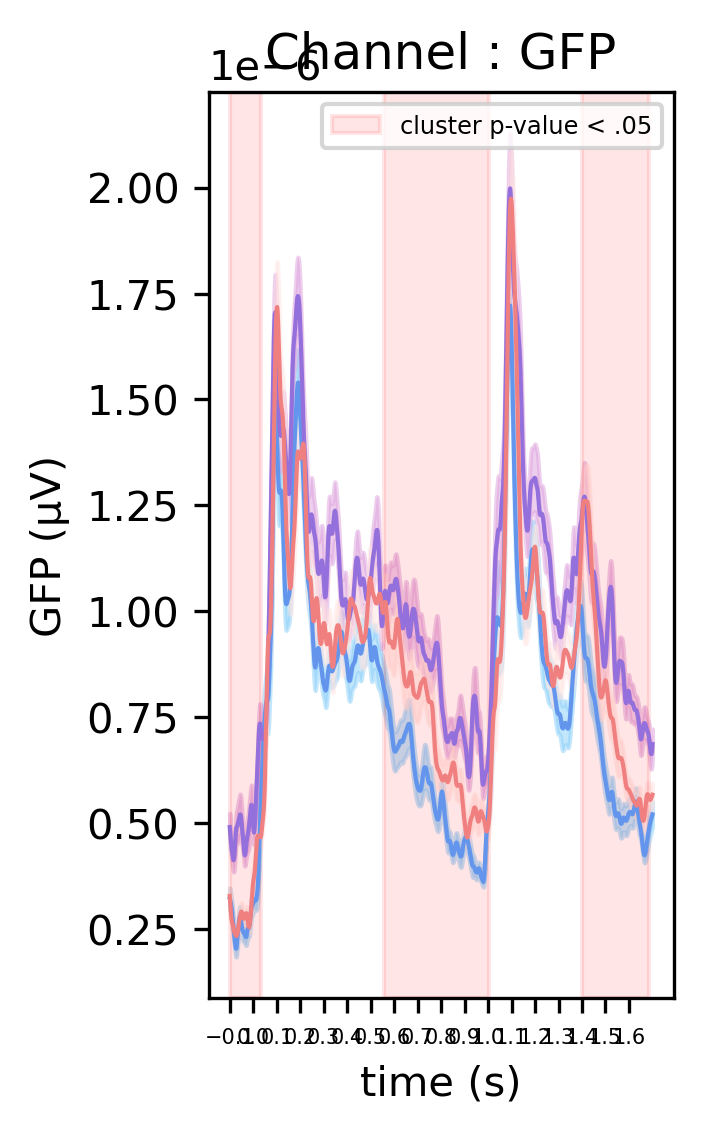

In [11]:
%matplotlib inline
f_values, cluster_pvals, clusters = applyPermutationClusterTestGFPs(gfp100, gfp31, gfp71, times, plot=True)
